In [ ]:
import os

import nibabel as nb
from functions import clean_func_image, edit_events_full_stability, estimate_stability, extract_features_for_stab
from nilearn import image, plotting

In [4]:
# data_root = "/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2"
data_root = "/DATAPOOL/BRAINPLAYBACK/BIDS-BRAINPLAYBACK-TASK2"  # sim01 dir

derivatives_dir = os.path.join(data_root, "derivatives")
fmriprep_dir = os.path.join(derivatives_dir, "fmriprep23")  # fmriprep output

output_func_dir = os.path.join(derivatives_dir, "func_clean")  # for cleaned bold images
output_mask_stab_dir = os.path.join(derivatives_dir, "mvpa_08_stability_bold", "stab_full_masks")  # for stability masks
output_feat_stab_dir = os.path.join(derivatives_dir, "mvpa_08_stability_bold", "stab_full_features")  # for the features

In [5]:
# check if all these folders exist, otherwise create them
for dir_ in [output_func_dir, output_mask_stab_dir, output_feat_stab_dir]:
    if not os.path.exists(dir_):
        os.makedirs(dir_)
        print(f"Created directory: {dir_}")

In [6]:
subject_list = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]

# Fetch and resample gray matter mask

In [7]:
from templateflow import api as tflow

t1w_img = tflow.get("MNI152NLin2009cAsym", desc="brain", resolution=2, suffix="T1w", extension="nii.gz")
t1w_gm_img = tflow.get("MNI152NLin2009cAsym", label="GM", suffix="probseg", resolution=2, extension="nii.gz")

/tmp/ipykernel_2982552/3235093110.py:11: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  gm_mask_resampled = image.resample_img(gm_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")
/tmp/ipykernel_2982552/3235093110.py:11: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  gm_mask_resampled = image.resample_img(gm_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axi


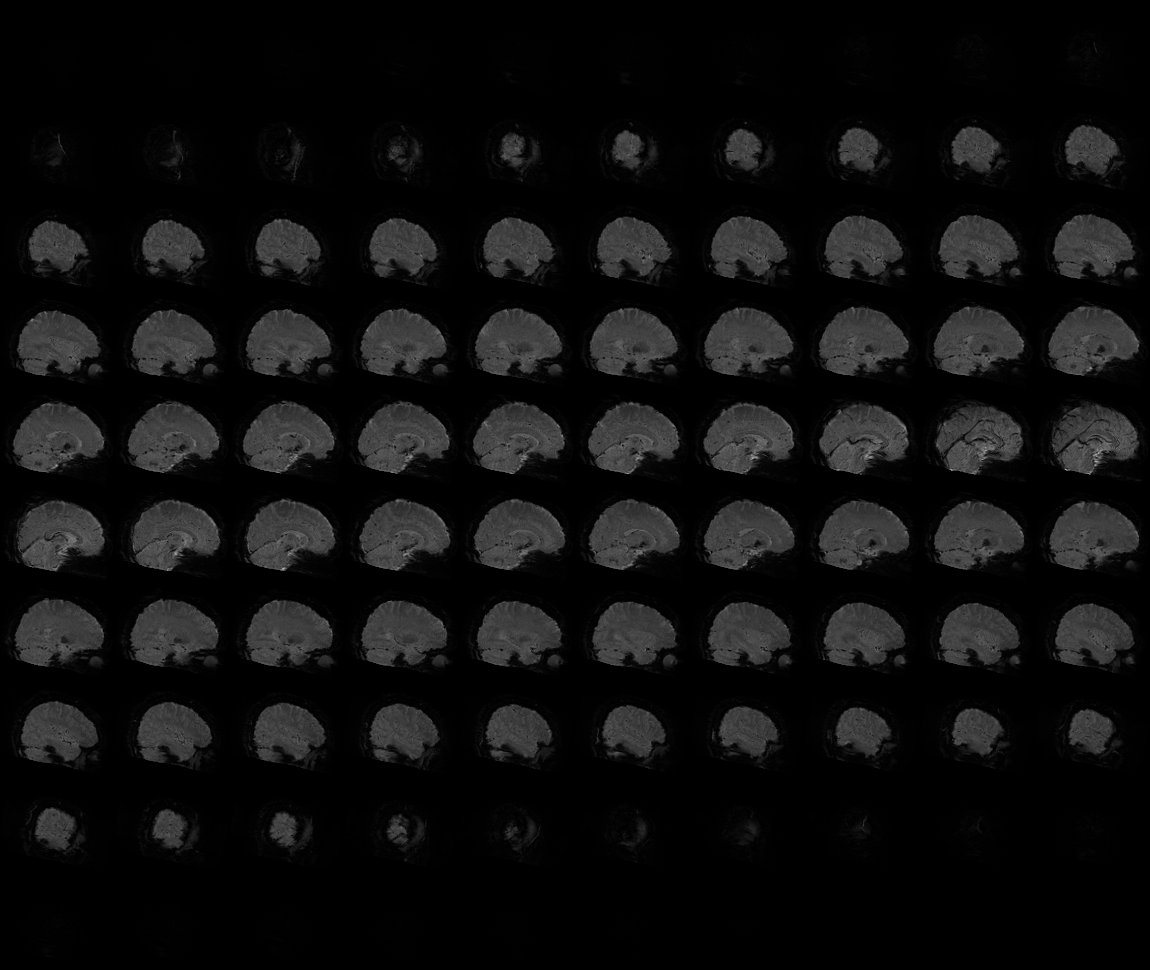
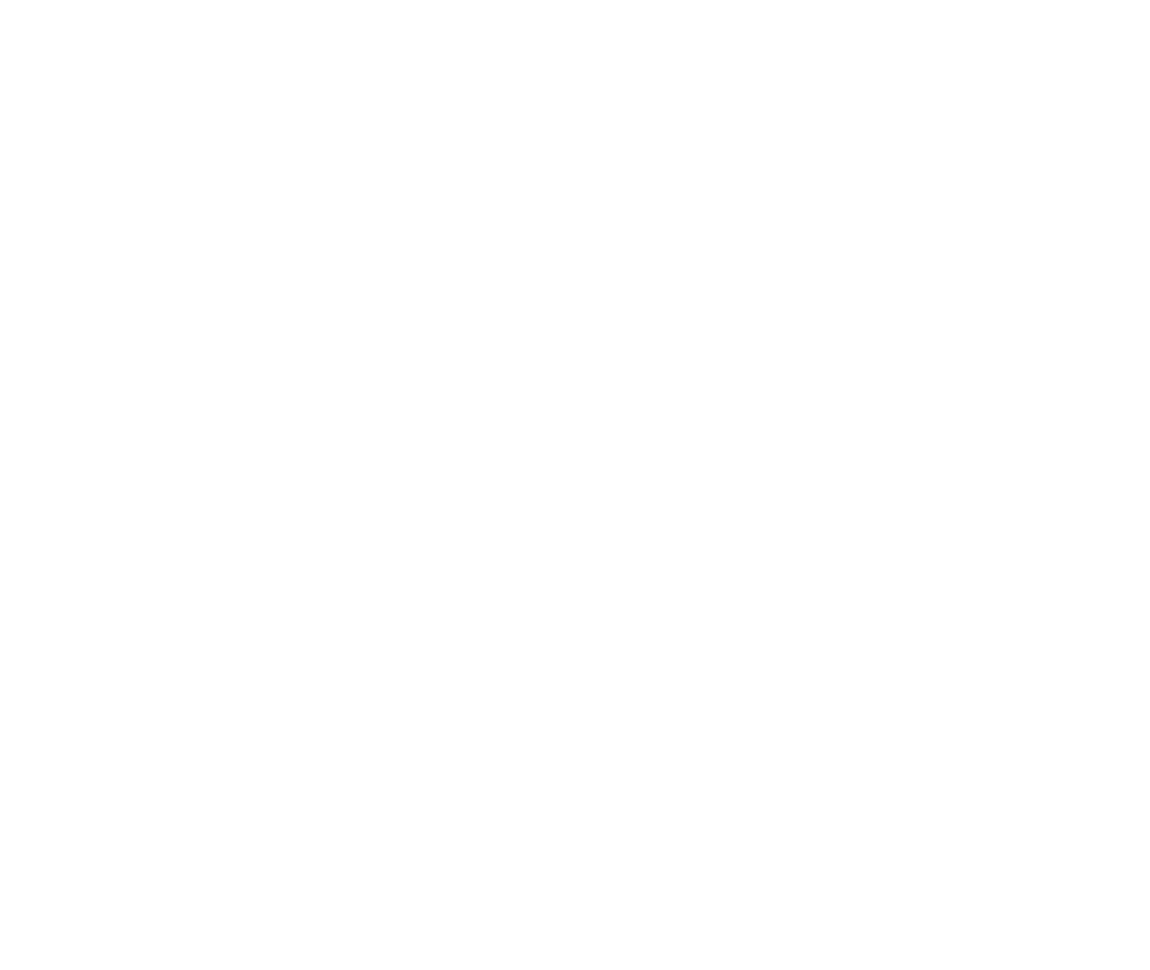

In [8]:
# reference image
example_func_file = os.path.join(
    fmriprep_dir, "sub-02", "ses-01", "func", "sub-02_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz"
)

# load, threshold, and resample the GM mask
gm_prob_mask = nb.load(t1w_gm_img)
example_func = nb.load(example_func_file)

gm_mask = image.math_img("img > 0.15", img=gm_prob_mask)
gm_mask_resampled = image.resample_img(gm_mask, target_affine=example_func.affine, target_shape=example_func.shape[0:3], interpolation="nearest")

plotting.view_img(gm_mask_resampled, bg_img=example_func.slicer[..., 0], symmetric_cmap=False, colorbar=True, title="GM mask", opacity=0.5)

## Clean and extract features

In [9]:
for subject in subject_list:
    # for run in ["1", "3", "4"]: # this one is for sub-18
    for run in ["1", "2", "3", "4"]:
        if subject == "18" and run == "2":
            continue  # skip this run for subject 18
        img_clean = clean_func_image(fmriprep_dir, output_func_dir, gm_mask_resampled, subject, run, overwrite=False)
        events_split = edit_events_full_stability(data_root, subject, run)
        extract_features_for_stab(img_clean, events_split, output_feat_stab_dir, subject, run)

    estimate_stability(output_feat_stab_dir, output_mask_stab_dir, subject)

Functional image already cleaned for subject 01, run 1.
Editing events for subject 01, run 1...
Events edited for subject 01, run 1.
Extracting features for subject 01 run 1...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 01 run 1.
Functional image already cleaned for subject 01, run 2.
Editing events for subject 01, run 2...
Events edited for subject 01, run 2.
Extracting features for subject 01 run 2...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 01 run 2.
Functional image already cleaned for subject 01, run 3.
Editing events for subject 01, run 3...
Events edited for subject 01, run 3.
Extracting features for subject 01 run 3...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 01 run 3.
Functional image already cleaned for subject 01, run 4.
Editing events for subject 01, run 4...
E

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 18/97...
X coordinate 16/97...
X coordinate 21/97...
X coordinate 17/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 27/97...
X coordinate 22/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...
X coordinate 25/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 36/97...
X coordinate 28/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 31/97...
X coordinate 26/97...
X coordinate 42/97...
X coordinate 34/97...
X coordinate 45/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 48/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 32/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 35/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 57/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 41/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 63/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 66/97...
X coordinate 58/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 72/97...
X coordinate 64/97...
X coordinate 75/97...
X coordinate 56/97...
X coordinate 67/97...
X coordinate 53/97...
X coordinate 59/97...
X coordinate 70/97...
X coordinate 62/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 71/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 82/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 80/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 83/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 18/97...
X coordinate 16/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 21/97...
X coordinate 17/97...
X coordinate 19/97...
X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 22/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 36/97...
X coordinate 28/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 42/97...
X coordinate 34/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...
X coordinate 37/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 48/97...
X coordinate 32/97...
X coordinate 51/97...
X coordinate 35/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 41/97...
X coordinate 57/97...
X coordinate 46/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 63/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 66/97...
X coordinate 58/97...
X coordinate 69/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 72/97...
X coordinate 50/97...
X coordinate 64/97...
X coordinate 75/97...
X coordinate 67/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 53/97...
X coordinate 70/97...
X coordinate 62/97...
X coordinate 73/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 71/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 77/97...
X coordinate 74/97...
X coordinate 83/97...
X coordinate 87/97...
X coordinate 80/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 18/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 21/97...
X coordinate 17/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 27/97...
X coordinate 22/97...
X coordinate 20/97...
X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 34/97...
X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 37/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...
X coordinate 48/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 57/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 69/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 64/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 72/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 75/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 70/97...
X coordinate 62/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 68/97...
X coordinate 84/97...
X coordinate 82/97...
X coordinate 71/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 80/97...
X coordinate 83/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 03.
Functional image already cleaned for subject 04, run 1.
Editing events for subject 04, run 1...
Events edited for subject 04, run 1.
Extracting features for subject 04 run 1...
9 conditions found per run.
Maxim

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 16/97...
X coordinate 18/97...
X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 22/97...
X coordinate 20/97...
X coordinate 27/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...
X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 34/97...
X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 80/97...
X coordinate 83/97...
X coordinate 74/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 22/97...
X coordinate 20/97...
X coordinate 27/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 23/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...
X coordinate 34/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 35/97...
X coordinate 48/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 49/97...
X coordinate 60/97...
X coordinate 44/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 47/97...
X coordinate 66/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 53/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 39/97...
X coordinate 34/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 32/97...
X coordinate 45/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 54/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 60/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 67/97...
X coordinate 59/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estim

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 22/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 32/97...
X coordinate 45/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 35/97...
X coordinate 48/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 54/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 44/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 73/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...X coordinate 77/97...

X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 19/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 20/97...
X coordinate 22/97...
X coordinate 27/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 29/97...
X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 48/97...
X coordinate 35/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 72/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 65/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 16/97...
X coordinate 18/97...
X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 27/97...
X coordinate 20/97...
X coordinate 22/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 60/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 71/97...X coordinate 85/97...

X coordinate 86/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 18/97...
X coordinate 16/97...
X coordinate 21/97...
X coordinate 17/97...
X coordinate 19/97...
X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 27/97...
X coordinate 22/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 20/97...
X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 54/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 50/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 53/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 56/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 21/97...
X coordinate 19/97...
X coordinate 24/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 20/97...
X coordinate 27/97...
X coordinate 22/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...
X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...
X coordinate 37/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 32/97...
X coordinate 40/97...
X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 67/97...
X coordinate 59/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 73/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 11.
Functional image already cleaned for subject 12, run 1.
Editing events for sub

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 23/97...
X coordinate 28/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 39/97...
X coordinate 34/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...
X coordinate 29/97...
X coordinate 37/97...
X coordinate 45/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 32/97...
X coordinate 40/97...
X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 54/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 60/97...
X coordinate 44/97...
X coordinate 52/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 47/97...
X coordinate 66/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 64/97...
X coordinate 72/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 59/97...
X coordinate 67/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 73/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 79/97...
X coordinate 68/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 83/97...
X coordinate 71/97...
X coordinate 77/97...
X coordinate 74/97...
X coordinate 80/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 12.
Functional image already cleaned for subject 13, run 1.
Editing events for subject 13, run 1...
Events edited for subject 13, run 1.
Extracting features for subject 13 run 1...
9 conditions found per run.
Maximum number of trials per condition per run: 2
Done exporting features for subject 13 run 1.
Functional image al

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 15/97...
X coordinate 16/97...
X coordinate 18/97...
X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 27/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...
X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 32/97...
X coordinate 45/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 57/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 49/97...
X coordinate 60/97...
X coordinate 44/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 50/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 75/97...
X coordinate 67/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 68/97...
X coordinate 83/97...
X coordinate 71/97...
X coordinate 80/97...
X coordinate 77/97...
X coordinate 74/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...
X coordinate 18/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 21/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 19/97...
X coordinate 24/97...
X coordinate 20/97...
X coordinate 27/97...
X coordinate 22/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 72/97...
X coordinate 67/97...
X coordinate 59/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 73/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 74/97...
X coordinate 80/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 14/97...
X coordinate 15/97...
X coordinate 16/97...
X coordinate 18/97...
X coordinate 17/97...
X coordinate 21/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 19/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 27/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 37/97...
X coordinate 29/97...
X coordinate 45/97...
X coordinate 32/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 54/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 44/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 47/97...
X coordinate 66/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 50/97...
X coordinate 72/97...
X coordinate 64/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 75/97...
X coordinate 67/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 81/97...
X coordinate 76/97...
X coordinate 79/97...
X coordinate 68/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...
X coordinate 23/97...
X coordinate 28/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 36/97...
X coordinate 31/97...
X coordinate 39/97...
X coordinate 26/97...
X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...
X coordinate 45/97...
X coordinate 37/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 32/97...
X coordinate 48/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 38/97...
X coordinate 41/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 50/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 70/97...
X coordinate 62/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 68/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordina

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 16/97...
X coordinate 18/97...
X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 20/97...
X coordinate 27/97...
X coordinate 30/97...
X coordinate 25/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 28/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 26/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 34/97...
X coordinate 42/97...
X coordinate 29/97...
X coordinate 37/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...
X coordinate 32/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 35/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...
X coordinate 54/97...
X coordinate 41/97...
X coordinate 46/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 57/97...
X coordinate 49/97...
X coordinate 60/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 52/97...
X coordinate 44/97...
X coordinate 63/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 47/97...
X coordinate 61/97...
X coordinate 69/97...
X coordinate 50/97...
X coordinate 72/97...
X coordinate 64/97...
X coordinate 56/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 53/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 81/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 74/97...
X coordinate 87/97...
X coordinate 77/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estim

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 23/97...
X coordinate 28/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 31/97...
X coordinate 36/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 34/97...
X coordinate 39/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 32/97...
X coordinate 37/97...
X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...
X coordinate 35/97...
X coordinate 40/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 48/97...
X coordinate 38/97...
X coordinate 43/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 46/97...
X coordinate 54/97...
X coordinate 49/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 44/97...
X coordinate 57/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 52/97...
X coordinate 60/97...
X coordinate 47/97...
X coordinate 55/97...
X coordinate 50/97...
X coordinate 63/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 61/97...
X coordinate 53/97...
X coordinate 56/97...
X coordinate 64/97...
X coordinate 69/97...
X coordinate 59/97...
X coordinate 67/97...
X coordinate 72/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 65/97...
X coordinate 75/97...
X coordinate 68/97...
X coordinate 73/97...
X coordinate 78/97...
X coordinate 76/97...
X coordinate 71/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 77/97...
X coordinate 74/97...
X coordinate 80/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 83/97...
X coordinate 86/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estim

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 18/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 17/97...
X coordinate 21/97...
X coordinate 19/97...
X coordinate 24/97...
X coordinate 22/97...
X coordinate 27/97...
X coordinate 20/97...
X coordinate 30/97...
X coordinate 25/97...
X coordinate 33/97...
X coordinate 23/97...
X coordinate 28/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 36/97...
X coordinate 31/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 39/97...
X coordinate 34/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 42/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 29/97...
X coordinate 37/97...
X coordinate 45/97...
X coordinate 32/97...
X coordinate 48/97...
X coordinate 40/97...
X coordinate 35/97...
X coordinate 51/97...
X coordinate 43/97...
X coordinate 38/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 54/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 49/97...
X coordinate 41/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 60/97...
X coordinate 52/97...
X coordinate 63/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 58/97...
X coordinate 66/97...
X coordinate 61/97...
X coordinate 47/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 50/97...
X coordinate 69/97...
X coordinate 64/97...
X coordinate 72/97...
X coordinate 59/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 62/97...
X coordinate 70/97...
X coordinate 78/97...
X coordinate 73/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 68/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 86/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 83/97...
X coordinate 80/97...
X coordinate 77/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estimating stability for subject 19.
Functional image already cleaned for subject 20, run 1.
Editing events for subject 20, run 1...
Events edited for subject 20, run 1.
Extracting 

/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 18/97...
X coordinate 16/97...
X coordinate 21/97...
X coordinate 17/97...
X coordinate 19/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 24/97...
X coordinate 27/97...
X coordinate 22/97...
X coordinate 20/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 30/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 25/97...
X coordinate 33/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 36/97...
X coordinate 28/97...
X coordinate 23/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 39/97...
X coordinate 31/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 26/97...
X coordinate 42/97...
X coordinate 34/97...
X coordinate 37/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 45/97...
X coordinate 29/97...
X coordinate 48/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 40/97...
X coordinate 32/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 51/97...
X coordinate 35/97...
X coordinate 38/97...
X coordinate 43/97...
X coordinate 54/97...
X coordinate 46/97...
X coordinate 57/97...
X coordinate 41/97...
X coordinate 49/97...
X coordinate 60/97...


/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/DATAPOOL/home/alexandresayal/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


X coordinate 63/97...
X coordinate 52/97...
X coordinate 44/97...
X coordinate 55/97...
X coordinate 66/97...
X coordinate 58/97...
X coordinate 47/97...
X coordinate 69/97...
X coordinate 61/97...
X coordinate 50/97...
X coordinate 72/97...
X coordinate 64/97...
X coordinate 67/97...
X coordinate 75/97...
X coordinate 59/97...
X coordinate 56/97...
X coordinate 53/97...
X coordinate 70/97...
X coordinate 62/97...
X coordinate 73/97...
X coordinate 78/97...
X coordinate 65/97...
X coordinate 76/97...
X coordinate 68/97...
X coordinate 81/97...
X coordinate 79/97...
X coordinate 82/97...
X coordinate 84/97...
X coordinate 85/97...
X coordinate 71/97...
X coordinate 74/97...
X coordinate 86/97...
X coordinate 77/97...
X coordinate 83/97...
X coordinate 87/97...
X coordinate 88/97...
X coordinate 89/97...
X coordinate 80/97...
X coordinate 90/97...
X coordinate 91/97...
X coordinate 92/97...
X coordinate 93/97...
X coordinate 94/97...
X coordinate 95/97...
X coordinate 96/97...
Done estim